#**Import necessacy libraries**

In [1]:
#Importing Data manipulation and plotting modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
#Importing libraries for modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.neighbors import KNeighborsClassifier

In [3]:
#Importing libraries for Data pre-processing
from sklearn.preprocessing import StandardScaler

In [4]:
#Importing model for Dimentionality Reduction
from sklearn.decomposition import PCA

In [5]:
#Importing libraries for performance measures
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc, roc_curve

In [6]:
#Importing libraries For data splitting
from sklearn.model_selection import train_test_split

#**Loading dataset**

In [7]:
os.chdir("../input")

In [8]:
data = pd.read_csv("data.csv")

In [9]:
pd.options.display.max_columns = 200

#**Get to know data**

In [10]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [11]:
data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [12]:
data.shape

(569, 33)

In [13]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [14]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


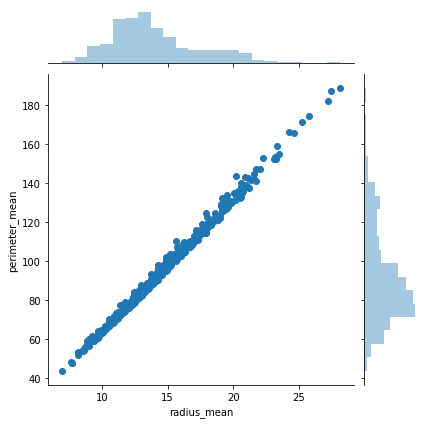

In [15]:
sns.jointplot(x='radius_mean',y='perimeter_mean',data=data)

###**Radius mean and perimeter mean have a linear relation**

#**Checking if any column has null values**

In [16]:
data.isnull().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

#**Drop columns having null values & unwanted columns**

In [17]:
data = data.drop(['id','Unnamed: 32'],axis=1)

In [18]:
data.shape

(569, 31)

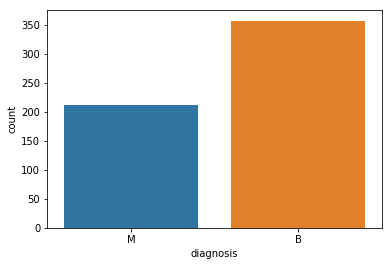

In [19]:
sns.countplot(x='diagnosis',data=data)

###**Shows number of Malignant and Benign cases**

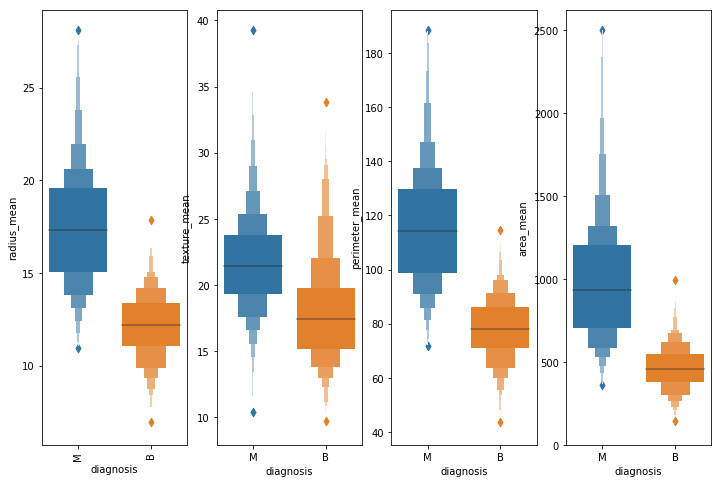

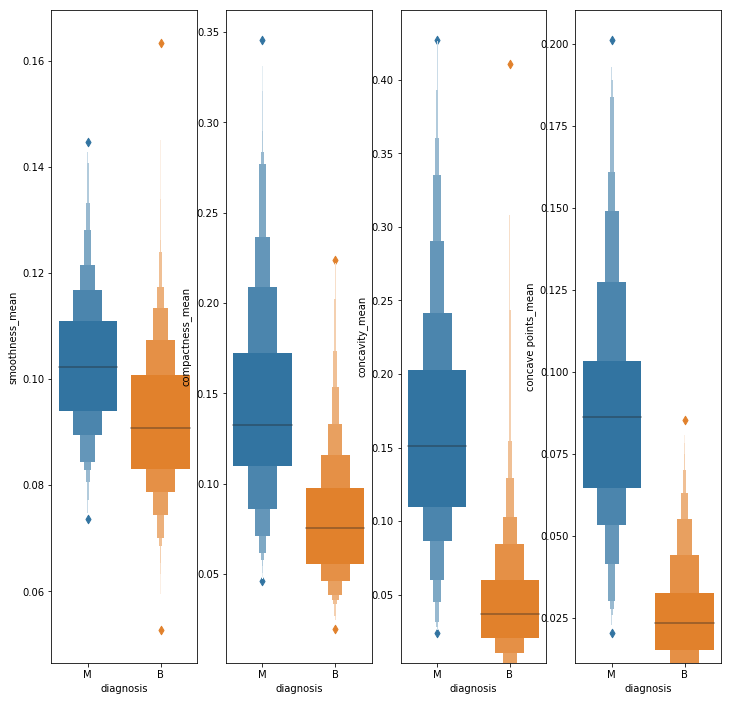

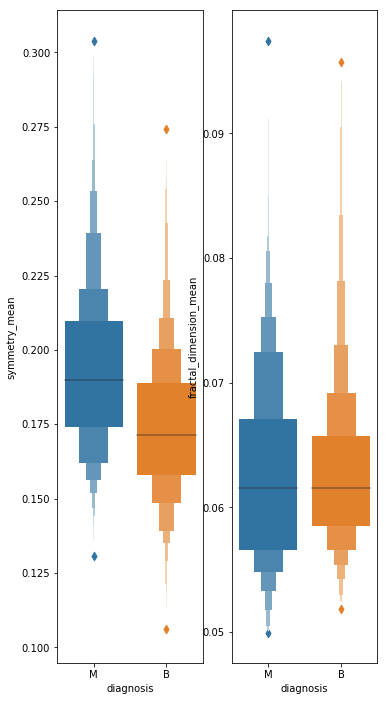

In [20]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1,4,1)
ax1.set_xticklabels(labels = 'Radius mean', rotation=90)
#plt.hist(x=data.radius_mean,bins=10)
sns.boxenplot(x='diagnosis',y='radius_mean',data=data)
ax1 = fig.add_subplot(1,4,2)
sns.boxenplot(x='diagnosis',y='texture_mean',data=data)
ax1 = fig.add_subplot(1,4,3)
sns.boxenplot(x='diagnosis',y='perimeter_mean',data=data)
ax1 = fig.add_subplot(1,4,4)
sns.boxenplot(x='diagnosis',y='area_mean',data=data)


fig2 = plt.figure(figsize=(12,12))
ax2 = fig2.add_subplot(1,4,1)
sns.boxenplot(x='diagnosis',y='smoothness_mean',data=data)
ax2 = fig2.add_subplot(1,4,2)
sns.boxenplot(x='diagnosis',y='compactness_mean',data=data)
ax2 = fig2.add_subplot(1,4,3)
sns.boxenplot(x='diagnosis',y='concavity_mean',data=data)
ax2 = fig2.add_subplot(1,4,4)
sns.boxenplot(x='diagnosis',y='concave points_mean',data=data)

fig3 = plt.figure(figsize=(12,12))
ax3 = fig3.add_subplot(1,4,1)
sns.boxenplot(x='diagnosis',y='symmetry_mean',data=data)
ax3 = fig3.add_subplot(1,4,2)
sns.boxenplot(x='diagnosis',y='fractal_dimension_mean',data=data)

###**The graph shows median values for Benign and Malignant cases. We can observe that median value of malignant cases is much higher compared to Benign cases**

#**Extracting 1 to 31 columns i.e total 30 columns**

In [21]:
X=data.iloc[:,1:32]

In [22]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [23]:
X.shape

(569, 30)

#**Extracting first column and Maping values in 'y' (target) from 'M' and 'B' to 1 and 0 respectively**

In [24]:
y=data.iloc[:,0]

In [25]:
y.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [26]:
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [27]:
y = y.map({'M':1, 'B' : 0})

In [28]:
y.dtype

dtype('int64')

#**Scaling all numerical features in X  using sklearn's StandardScaler class**

In [29]:
scaler = StandardScaler()

In [30]:
X = scaler.fit_transform(X)

#**Perform PCA**

In [31]:
pca = PCA()

In [32]:
principleComponents = pca.fit_transform(X)

In [33]:
principleComponents.shape

(569, 30)

In [34]:
pca.explained_variance_ratio_

array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 1.03864675e-03,
       9.99096464e-04, 9.14646751e-04, 8.11361259e-04, 6.01833567e-04,
       5.16042379e-04, 2.72587995e-04, 2.30015463e-04, 5.29779290e-05,
       2.49601032e-05, 4.43482743e-06])

#**95% of variance explained by first 10 columns**

In [35]:
X = pca.explained_variance_ratio_.cumsum()

In [36]:
X

array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 , 0.92598254, 0.93987903, 0.95156881,
       0.961366  , 0.97007138, 0.97811663, 0.98335029, 0.98648812,
       0.98915022, 0.99113018, 0.99288414, 0.9945334 , 0.99557204,
       0.99657114, 0.99748579, 0.99829715, 0.99889898, 0.99941502,
       0.99968761, 0.99991763, 0.99997061, 0.99999557, 1.        ])

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


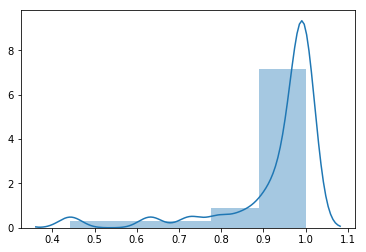

In [37]:
sns.distplot(X,bins=5)

#**assigning X with scaled data upto 10th feature**

In [38]:
X = principleComponents[:,0:11]

#**Split and shuffle data**

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20,
                                                    shuffle = True
                                                    )

In [40]:
X_train.shape

(455, 11)

In [41]:
X_test.shape

(114, 11)

#**Creating default classifiers**

In [42]:
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators=100)
xg = XGBClassifier(learning_rate=0.5,
                   reg_alpha= 5,
                   reg_lambda= 0.1
                   )
gbm = GradientBoostingClassifier()
etc = ExtraTreesClassifier(n_estimators=100)
knn = KNeighborsClassifier(n_neighbors=10)

#**Train data**

In [43]:
dt1 = dt.fit(X_train,y_train)
rf1 = rf.fit(X_train,y_train)
xg1 = xg.fit(X_train,y_train)
gbm1 = gbm.fit(X_train,y_train)
etc1 = etc.fit(X_train,y_train)
knn1 = knn.fit(X_train,y_train)

#**Making predictions**

In [44]:
y_pred_dt = dt1.predict(X_test)
y_pred_rf = rf1.predict(X_test)
y_pred_xg= xg1.predict(X_test)
y_pred_gbm= gbm1.predict(X_test)
y_pred_etc= etc1.predict(X_test)
y_pred_knn = knn1.predict(X_test)

#**Getting probability values**

In [45]:
y_pred_dt_prob = dt1.predict_proba(X_test)
y_pred_rf_prob = rf1.predict_proba(X_test)
y_pred_xg_prob = xg1.predict_proba(X_test)
y_pred_gbm_prob= gbm1.predict_proba(X_test)
y_pred_etc_prob= etc1.predict_proba(X_test)
y_pred_knn_prob= knn1.predict_proba(X_test)

#**Calculating accuracy**

In [46]:
accuracy_score(y_test,y_pred_dt)

0.9385964912280702

In [47]:
accuracy_score(y_test,y_pred_rf)

0.9473684210526315

In [48]:
accuracy_score(y_test,y_pred_xg)

0.9649122807017544

In [49]:
accuracy_score(y_test,y_pred_gbm)

0.956140350877193

In [50]:
accuracy_score(y_test,y_pred_etc)

0.9649122807017544

In [51]:
accuracy_score(y_test,y_pred_knn)

0.956140350877193

#**Confusion matrixx and plotting the same**

In [52]:
confusion_matrix(y_test,y_pred_dt)

array([[69,  2],
       [ 5, 38]])

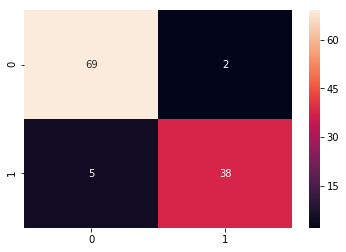

In [53]:
sns.heatmap(confusion_matrix(y_test,y_pred_dt),annot=True)

In [54]:
confusion_matrix(y_test,y_pred_rf)

array([[69,  2],
       [ 4, 39]])

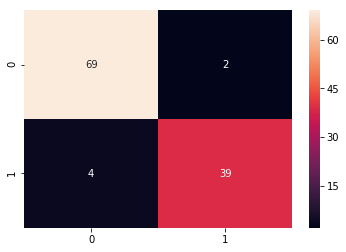

In [55]:
sns.heatmap(confusion_matrix(y_test,y_pred_rf),annot=True)

In [56]:
confusion_matrix(y_test,y_pred_xg)

array([[70,  1],
       [ 3, 40]])

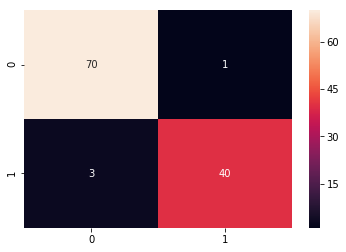

In [57]:
sns.heatmap(confusion_matrix(y_test,y_pred_xg),annot=True)

In [58]:
confusion_matrix(y_test,y_pred_gbm)

array([[69,  2],
       [ 3, 40]])

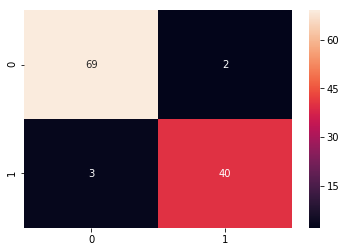

In [59]:
sns.heatmap(confusion_matrix(y_test,y_pred_gbm),annot=True)

In [60]:
confusion_matrix(y_test,y_pred_etc)

array([[71,  0],
       [ 4, 39]])

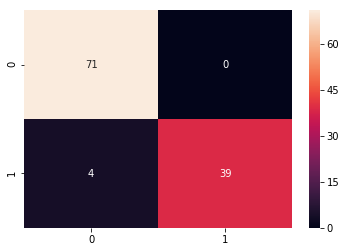

In [61]:
sns.heatmap(confusion_matrix(y_test,y_pred_etc),annot=True)

In [62]:
confusion_matrix(y_test,y_pred_knn)

array([[71,  0],
       [ 5, 38]])

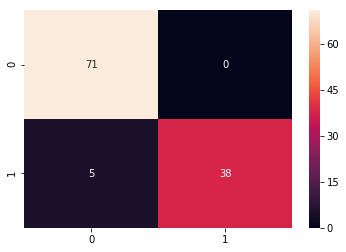

In [63]:
sns.heatmap(confusion_matrix(y_test,y_pred_knn),annot=True)

#**Obtaining true negative, false positive, false negative & true positive for all models**

In [64]:
tn,fp,fn,tp= confusion_matrix(y_test,y_pred_dt).flatten()

In [65]:
tn,fp,fn,tp

(69, 2, 5, 38)

In [66]:
tn,fp,fn,tp= confusion_matrix(y_test,y_pred_xg).flatten()

In [67]:
tn,fp,fn,tp

(70, 1, 3, 40)

In [68]:
tn,fp,fn,tp= confusion_matrix(y_test,y_pred_rf).flatten()

In [69]:
tn,fp,fn,tp

(69, 2, 4, 39)

In [70]:
tn,fp,fn,tp= confusion_matrix(y_test,y_pred_gbm).flatten()

In [71]:
tn,fp,fn,tp

(69, 2, 3, 40)

In [72]:
tn,fp,fn,tp= confusion_matrix(y_test,y_pred_etc).flatten()

In [73]:
tn,fp,fn,tp

(71, 0, 4, 39)

In [74]:
tn,fp,fn,tp= confusion_matrix(y_test,y_pred_knn).flatten()

In [75]:
tn,fp,fn,tp

(71, 0, 5, 38)

#**Plotting ROC curve for each model**

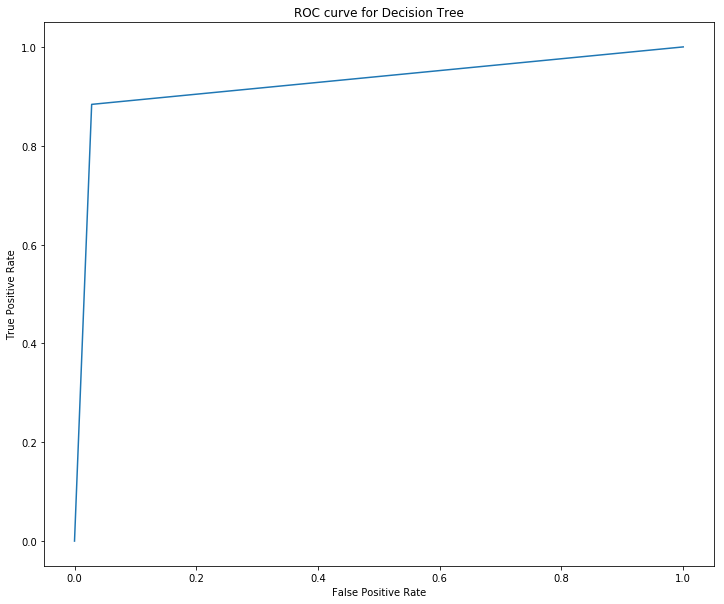

In [76]:
fpr_dt, tpr_dt, thresholds = roc_curve(y_test,
                                 y_pred_dt_prob[: , 1],
                                 pos_label= 1
                                 )
fig = plt.figure(figsize=(12,10))          # Create window frame
ax = fig.add_subplot(111)   # Create axes
ax.set_xlabel('False Positive Rate')  # Final plot decorations
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curve for Decision Tree')
ax.plot(fpr_dt, tpr_dt, label = "dt")

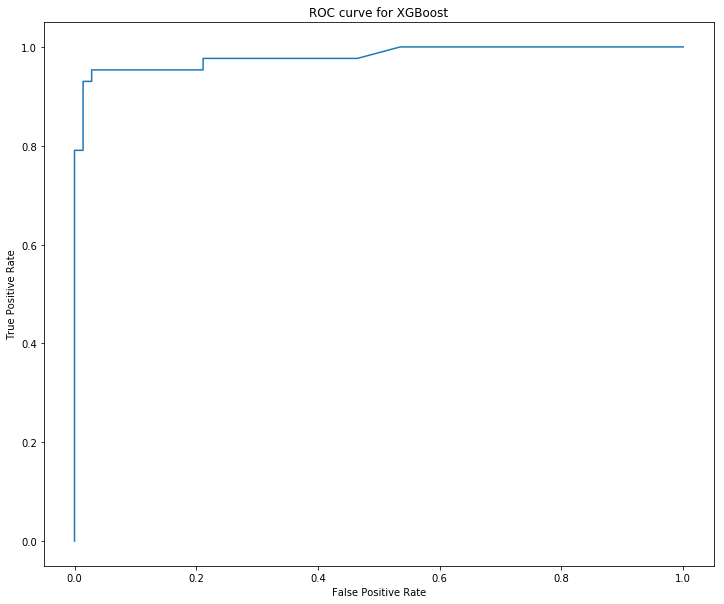

In [77]:
fpr_xg, tpr_xg, thresholds = roc_curve(y_test,
                                 y_pred_xg_prob[: , 1],
                                 pos_label= 1
                                 )
fig = plt.figure(figsize=(12,10))          # Create window frame
ax = fig.add_subplot(111)   # Create axes
ax.set_xlabel('False Positive Rate')  # Final plot decorations
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curve for XGBoost')
ax.plot(fpr_xg, tpr_xg, label = "xg")

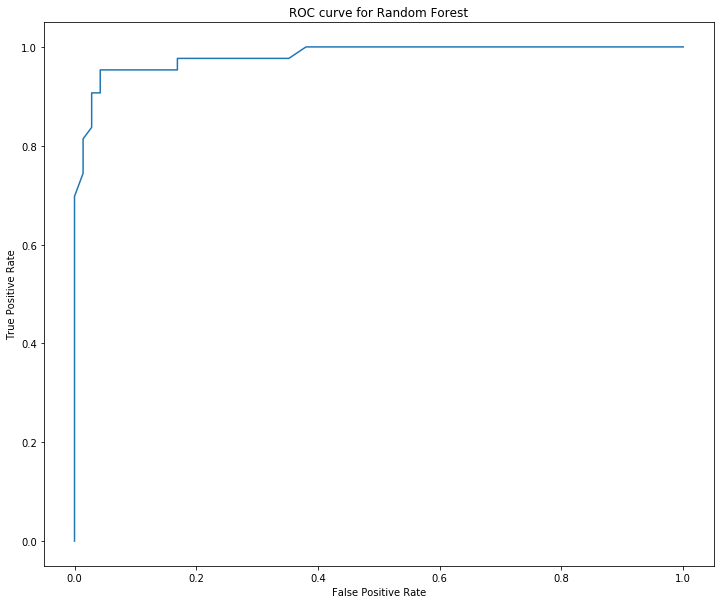

In [78]:
fpr_rf, tpr_rf, thresholds = roc_curve(y_test,
                                 y_pred_rf_prob[: , 1],
                                 pos_label= 1
                                 )

fig = plt.figure(figsize=(12,10))          # Create window frame
ax = fig.add_subplot(111)   # Create axes
ax.set_xlabel('False Positive Rate')  # Final plot decorations
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curve for Random Forest')
ax.plot(fpr_rf, tpr_rf, label = "rf")

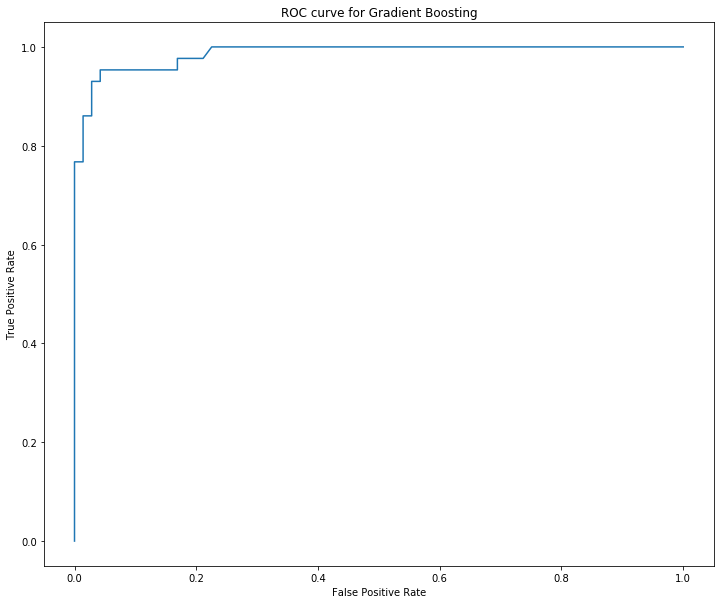

In [79]:
fpr_gbm, tpr_gbm,thresholds = roc_curve(y_test,
                                 y_pred_gbm_prob[: , 1],
                                 pos_label= 1
                                 )
fig = plt.figure(figsize=(12,10))          # Create window frame
ax = fig.add_subplot(111)   # Create axes
ax.set_xlabel('False Positive Rate')  # Final plot decorations
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curve for Gradient Boosting')
ax.plot(fpr_gbm, tpr_gbm, label = "gbm")

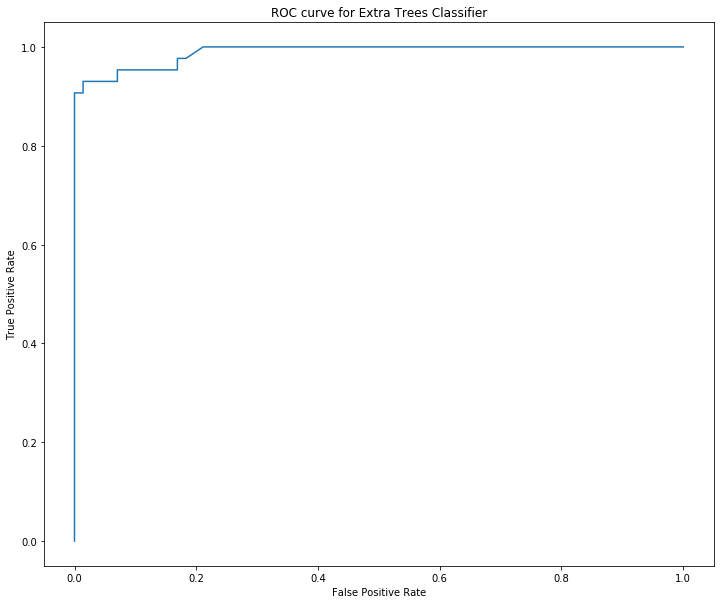

In [80]:
fpr_etc, tpr_etc,thresholds = roc_curve(y_test,
                                 y_pred_etc_prob[: , 1],
                                 pos_label= 1
                                 )
fig = plt.figure(figsize=(12,10))          # Create window frame
ax = fig.add_subplot(111)   # Create axes
ax.set_xlabel('False Positive Rate')  # Final plot decorations
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curve for Extra Trees Classifier')
ax.plot(fpr_etc, tpr_etc, label = "etc")

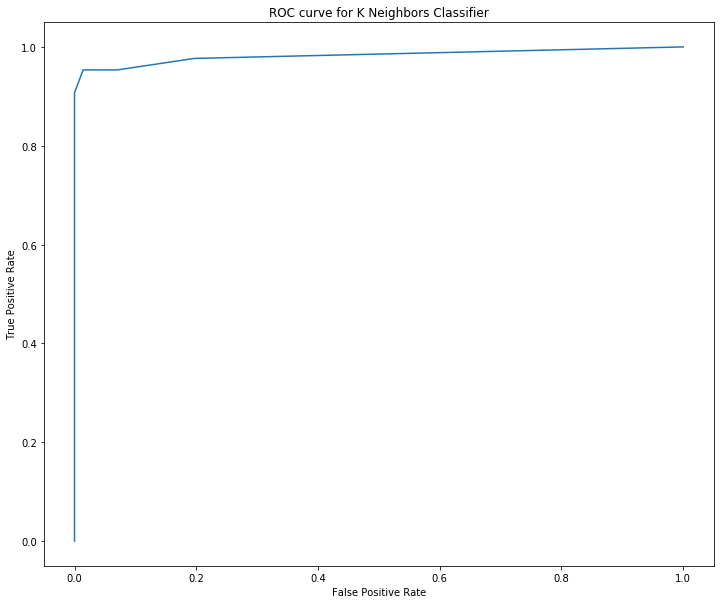

In [81]:
fpr_knn, tpr_knn,thresholds = roc_curve(y_test,
                                 y_pred_knn_prob[: , 1],
                                 pos_label= 1
                                 )
fig = plt.figure(figsize=(12,10))          # Create window frame
ax = fig.add_subplot(111)   # Create axes
ax.set_xlabel('False Positive Rate')  # Final plot decorations
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curve for K Neighbors Classifier')
ax.plot(fpr_knn, tpr_knn, label = "knn")

#**Calculating area under curve (AUC) for each model**

In [82]:
#AUC of decision tree
auc(fpr_dt,tpr_dt)

0.9277759580740256

In [83]:
#AUC of Random forest
auc(fpr_rf,tpr_rf)

0.9818211595152309

In [84]:
#AUC of Gradient boosting
auc(fpr_gbm,tpr_gbm)

0.9867343596462496

In [85]:
#AUC of XG Boost
auc(fpr_xg,tpr_xg)

0.9808385194890272

In [86]:
#AUC of Extra Tree Classifier
auc(fpr_etc, tpr_etc)

0.9895185063871601

In [87]:
#AUC of KNeighbor Classifier
auc(fpr_knn, tpr_knn)

0.982640026203734

In [88]:
p_dt,r_dt,f_dt,_ = precision_recall_fscore_support(y_test,y_pred_dt)

In [89]:
p_dt,r_dt,f_dt,_

(array([0.93243243, 0.95      ]),
 array([0.97183099, 0.88372093]),
 array([0.95172414, 0.91566265]),
 array([71, 43]))

In [90]:
p_rf,r_rf,f_rf,_ = precision_recall_fscore_support(y_test,y_pred_rf)

In [91]:
p_rf,r_rf,f_rf,_

(array([0.94520548, 0.95121951]),
 array([0.97183099, 0.90697674]),
 array([0.95833333, 0.92857143]),
 array([71, 43]))

In [92]:
p_gbm,r_gbm,f_gbm,_ = precision_recall_fscore_support(y_test,y_pred_gbm)

In [93]:
p_gbm,r_gbm,f_gbm,_

(array([0.95833333, 0.95238095]),
 array([0.97183099, 0.93023256]),
 array([0.96503497, 0.94117647]),
 array([71, 43]))

In [94]:
p_xg,r_xg,f_xg,_ = precision_recall_fscore_support(y_test,y_pred_xg)

In [95]:
p_xg,r_xg,f_xg,_

(array([0.95890411, 0.97560976]),
 array([0.98591549, 0.93023256]),
 array([0.97222222, 0.95238095]),
 array([71, 43]))

In [96]:
p_etc,r_etc,f_etc,_ = precision_recall_fscore_support(y_test,y_pred_etc)

In [97]:
p_etc,r_etc,f_etc,_

(array([0.94666667, 1.        ]),
 array([1.        , 0.90697674]),
 array([0.97260274, 0.95121951]),
 array([71, 43]))

In [98]:
p_knn,r_knn,f_knn,_ = precision_recall_fscore_support(y_test,y_pred_knn)

In [99]:
p_knn,r_knn,f_knn,_

(array([0.93421053, 1.        ]),
 array([1.        , 0.88372093]),
 array([0.96598639, 0.9382716 ]),
 array([71, 43]))

#**Graph combining all models plotted above**

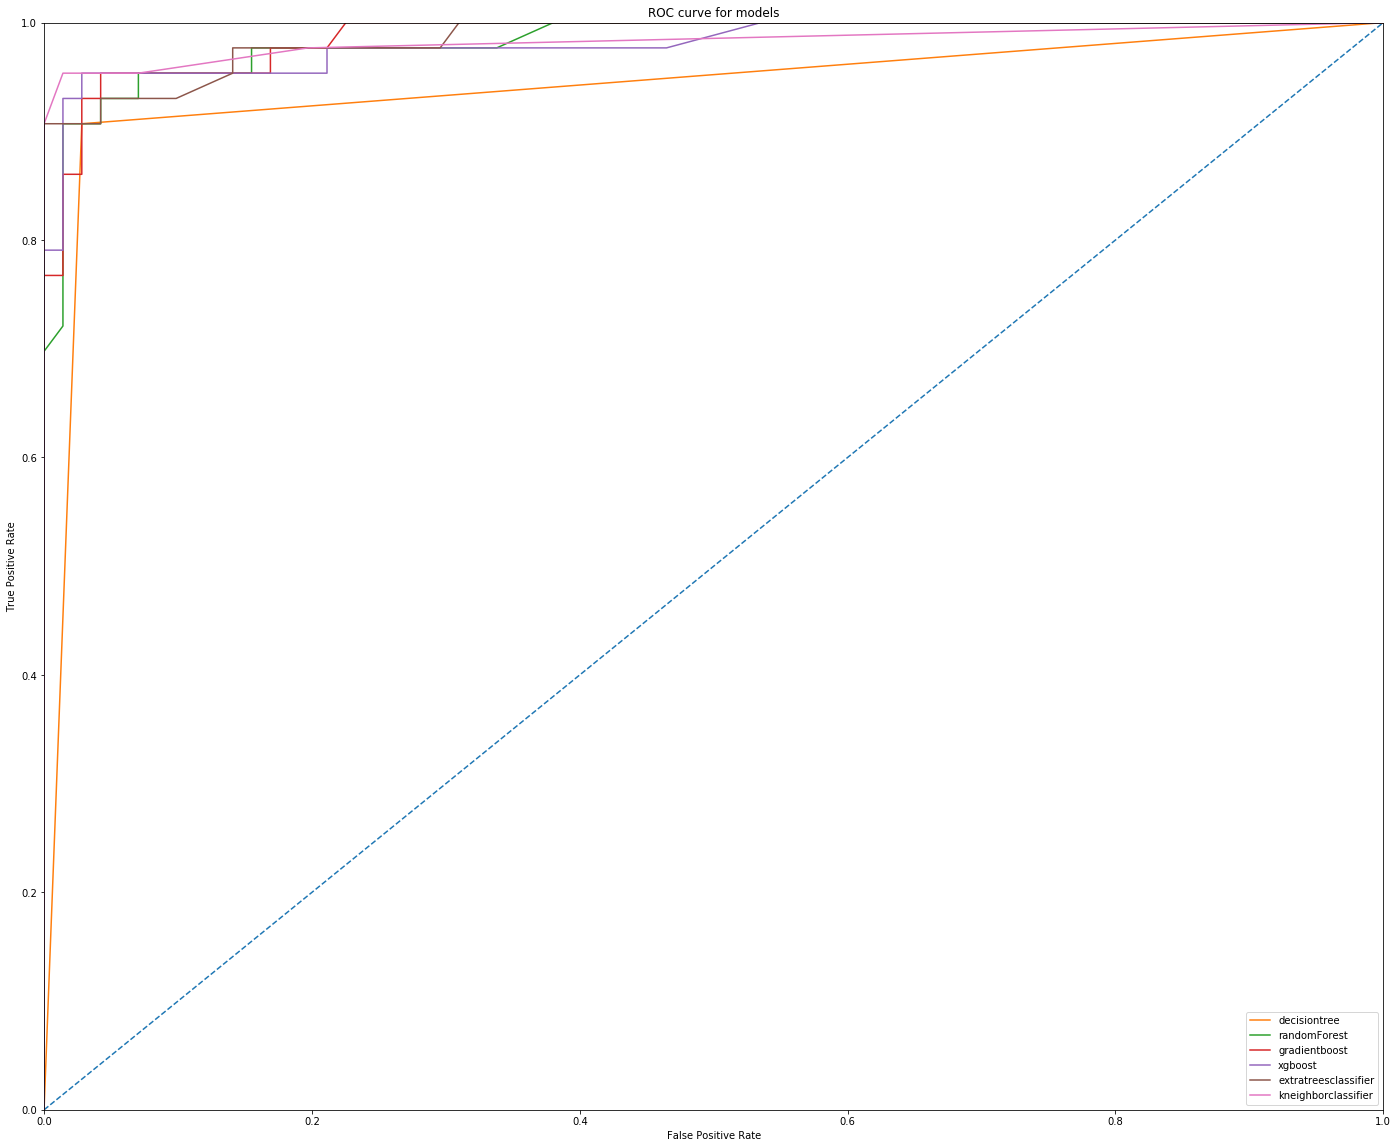

[0.9394038650507697,
 0.982640026203734,
 0.9867343596462496,
 0.9808385194890272,
 0.9859154929577465,
 0.982640026203734]

In [100]:
models = [(dt, "decisiontree"), (rf, "randomForest"), (gbm, "gradientboost"),(xg,"xgboost"),(etc,"extratreesclassifier"),(knn,"kneighborclassifier")]
#Plot the ROC curve
fig = plt.figure(figsize=(24,20))          # Create window frame
ax = fig.add_subplot(111)   # Create axes
# Also connect diagonals
ax.plot([0, 1], [0, 1], ls="--")   # Dashed diagonal line
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curve for models')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
AUC = []
for clf,name in models:
    clf.fit(X_train,y_train)
    y_pred_prob = clf.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test,
                                     y_pred_prob[: , 1],
                                     pos_label= 1
                                     )
    AUC.append((auc(fpr,tpr)))
    ax.plot(fpr, tpr, label = name)



ax.legend(loc="lower right")
plt.show()
AUC